In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
oversampled_data_2001 = pd.read_csv('oversampled_data_2001.csv')
oversampled_data_2009 = pd.read_csv('oversampled_data_2009.csv')
oversampled_data_2017 = pd.read_csv('oversampled_data_2017.csv')
oversampled_data_AllVariables_2001 = pd.read_csv('SMOTE_All/oversampled_data_2001_AllVariables.csv')
oversampled_data_AllVariables_2009 = pd.read_csv('SMOTE_All/oversampled_data_2009_AllVariables.csv')
oversampled_data_AllVariables_2017 = pd.read_csv('SMOTE_All/oversampled_data_2017_AllVariables.csv')

In [3]:
oversampled_data_2001[:5]

,TIMETOWK,GCDWORK,TRIPPURP,WHYTO,WKFMHMXX,DRIVER,WRKTRANS,NWALKTRP,HHSIZE,WHYTRP1S,...,NBIKETRP,R_AGE,CNTTDTR,WRKCOUNT,URBRUR,HHFAMINC,WEBUSE,HOUSEID,PERSONID,HHFAMINC2
0,15,2,0,0,0,0,0,20,1,0,...,0,55,5,1,0,0,0,10000045,1,0
1,15,2,1,1,0,0,0,20,1,1,...,0,55,5,1,0,0,0,10000045,1,0
2,15,2,1,2,0,0,0,20,1,2,...,0,55,5,1,0,0,0,10000045,1,0
3,15,2,1,0,0,0,0,20,1,0,...,0,55,5,1,0,0,0,10000045,1,0
4,15,2,0,3,0,0,0,20,1,3,...,0,55,5,1,0,0,0,10000045,1,0


In [4]:
# Check the available columns for common variables. 2001, 2009, and 2017 have the same columns, so just check for 2001.
oversampled_data_2001.columns.unique()

Index(['TIMETOWK', 'GCDWORK', 'TRIPPURP', 'WHYTO', 'WKFMHMXX', 'DRIVER',
       'WRKTRANS', 'NWALKTRP', 'HHSIZE', 'WHYTRP1S', 'WHYFROM', 'NBIKETRP',
       'R_AGE', 'CNTTDTR', 'WRKCOUNT', 'URBRUR', 'HHFAMINC', 'WEBUSE',
       'HOUSEID', 'PERSONID', 'HHFAMINC2'],
      dtype='object')

In [5]:
# Check the available columns for "all" variables
oversampled_data_AllVariables_2017.columns.unique()

Index(['HOUSEID', 'PERSONID', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTO',
       'HHFAMINC', 'WRKCOUNT', 'URBRUR', 'R_AGE', 'DRIVER', 'WRKTRANS',
       'NWALKTRP', 'NBIKETRP', 'CARSHARE', 'TIMETOWK', 'WKFMHMXX', 'SCHTRN1',
       'SCHTRN2', 'DELIVER', 'CNTTDTR', 'GCDWORK', 'DISTTOWK', 'DISTTOSC',
       'BIKE', 'CAR', 'BUS', 'TRAIN', 'WEBUSE', 'HHSIZE', 'WEBUSE.1',
       'HHFAMINC2'],
      dtype='object')

# Travel Patterns by Income and Location

## 1)	Where do people in different income groups live? (urban/rural) 

In [6]:
# Define the income and urban/rural labels
income_labels = {0: 'Low Income', 1: 'Medium Income', 2: 'High Income'}
urbrur_labels = {0: 'Urban', 1: 'Rural'}

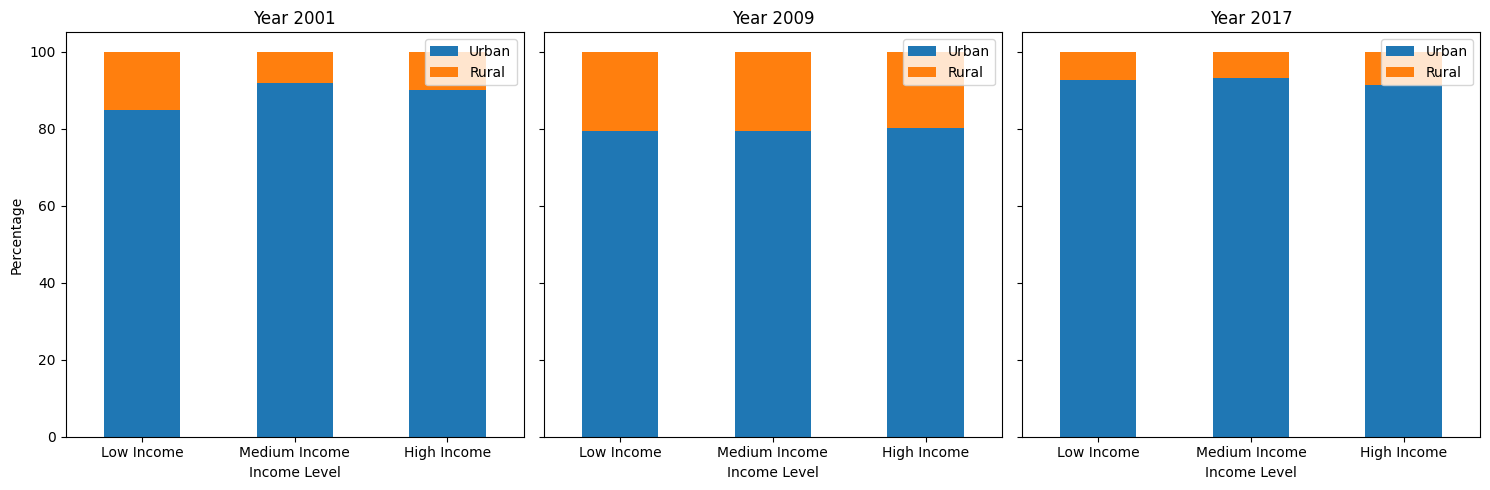

In [7]:
# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# List of years
years = [2001, 2009, 2017]

# Iterate over each dataframe and create a plot
for i, df in enumerate([oversampled_data_2001, oversampled_data_2009, oversampled_data_2017]):
    # Group the data by income and urban/rural and count occurrences
    counts = df.groupby(['HHFAMINC2', 'URBRUR']).size().unstack()

    # Percentages
    counts = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot a stacked bar plot
    counts.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Set labels and title
    axes[i].set_title(f'Year {years[i]}')
    axes[i].set_xlabel('Income Level')
    axes[i].set_ylabel('Percentage')
    
    # Set tick locations and labels dynamically
    axes[i].set_xticks(range(len(income_labels)))
    axes[i].set_xticklabels([income_labels[x] for x in counts.index], rotation=0)
    
    # Add legend using the columns of the DataFrame
    axes[i].legend([urbrur_labels[x] for x in counts.columns], loc='upper right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

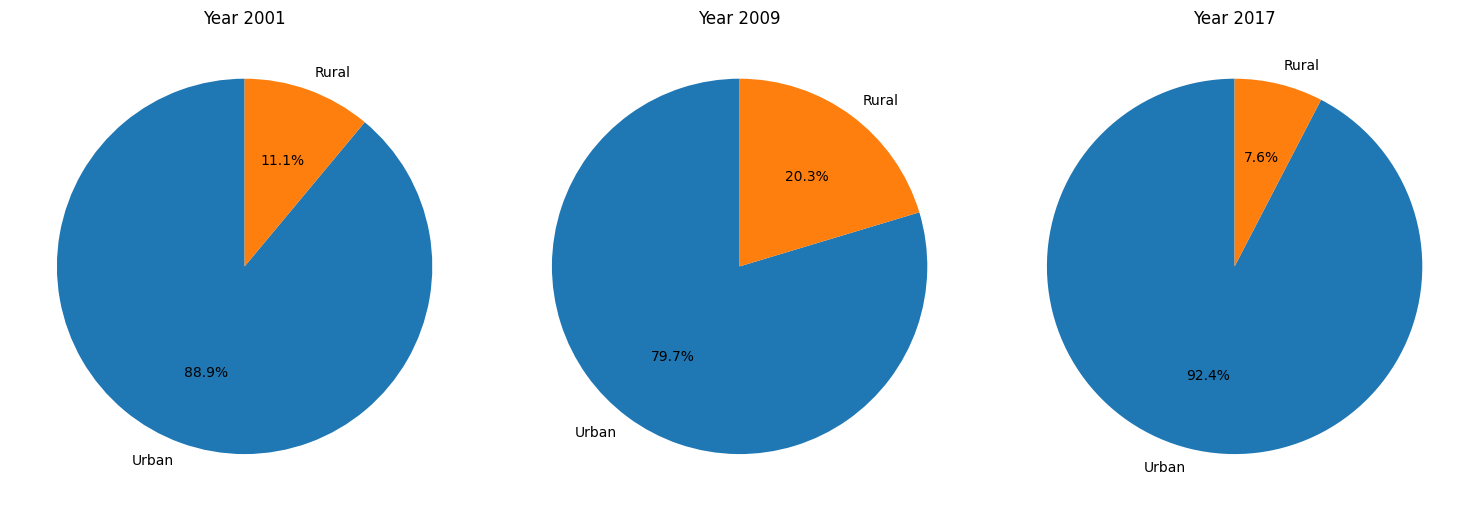

In [8]:
# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# List of years
years = [2001, 2009, 2017]

# Iterate over each dataframe and create a plot
for i, df in enumerate([oversampled_data_2001, oversampled_data_2009, oversampled_data_2017]):
    # Group the data by urban/rural and count occurrences
    counts = df.groupby('URBRUR').size()

    # Percentages
    percentages = counts / counts.sum() * 100

    # Plot a pie plot
    axes[i].pie(percentages, labels=[urbrur_labels[x] for x in counts.index], autopct='%1.1f%%', startangle=90)
    
    # Set title
    axes[i].set_title(f'Year {years[i]}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


There's a significant imbalance in the dataset between urban and rural samples. The dataset comprises approximately 80% urban and 20% rural data points. 

## 2)	How far is each income group’s house from the workplace? 

Outliers, such as extreamly long travel times or distance, arise due to errors in self-reported surveys, where inaccuracies can easily occur.

To filter out outliers (time or distance <0 or too large values), we'll use statistical methods which is the interquartile range (IQR) to identify and remove outliers. 

The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. Data points beyond a certain distance from the IQR boundaries can be considered outliers.

In [9]:
# Function to filter outliers using IQR
def filter_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    return data_series[(data_series >= Q1 - 1.5 * IQR) & (data_series <= Q3 + 1.5 * IQR)]

In [10]:
# Define the order of income groups
income_order = ['Low Income', 'Medium Income', 'High Income']

#### 2.1) The great-circle distance 
- GCDWORK: great-circle distance orthodromic distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere.

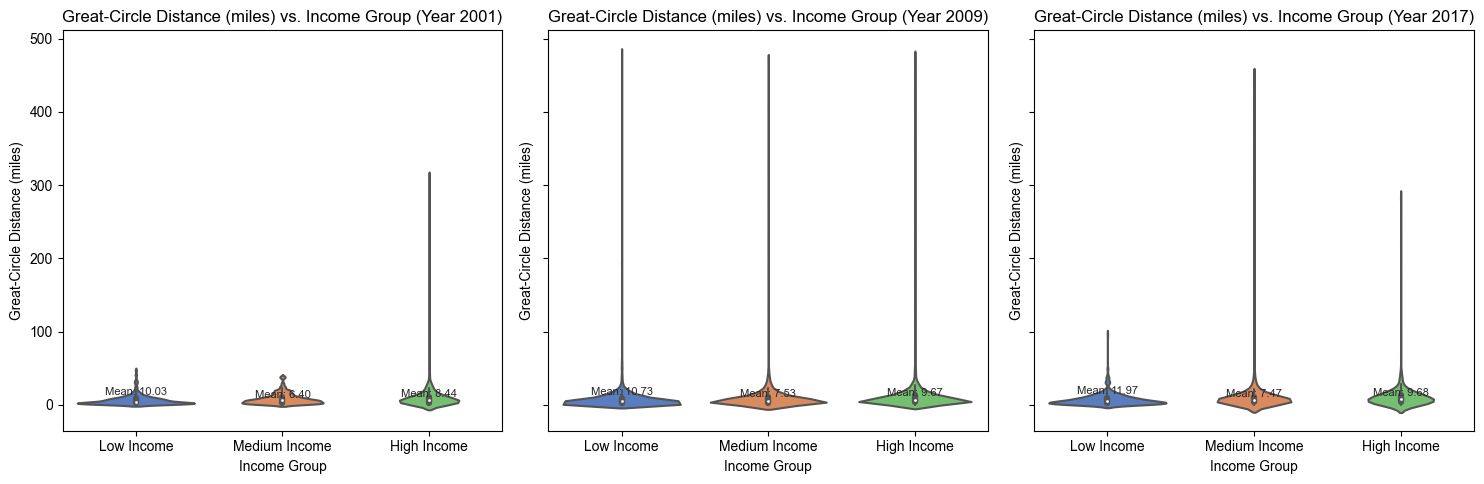

In [11]:
# When not filtering out the outliers

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out distance that is less than or equal to 0 and greater than 500 for the current year
    oversampled_data_year = globals()[f'oversampled_data_{year}']
    filtered_data = oversampled_data_year[(oversampled_data_year['GCDWORK'] > 0) & (oversampled_data_year['GCDWORK'] <= 500)]

    # Create a new DataFrame for better readability
    data = {
        'GCDWORK': filtered_data['GCDWORK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['GCDWORK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='GCDWORK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Great-Circle Distance (miles) vs. Income Group (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Great-Circle Distance (miles)')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


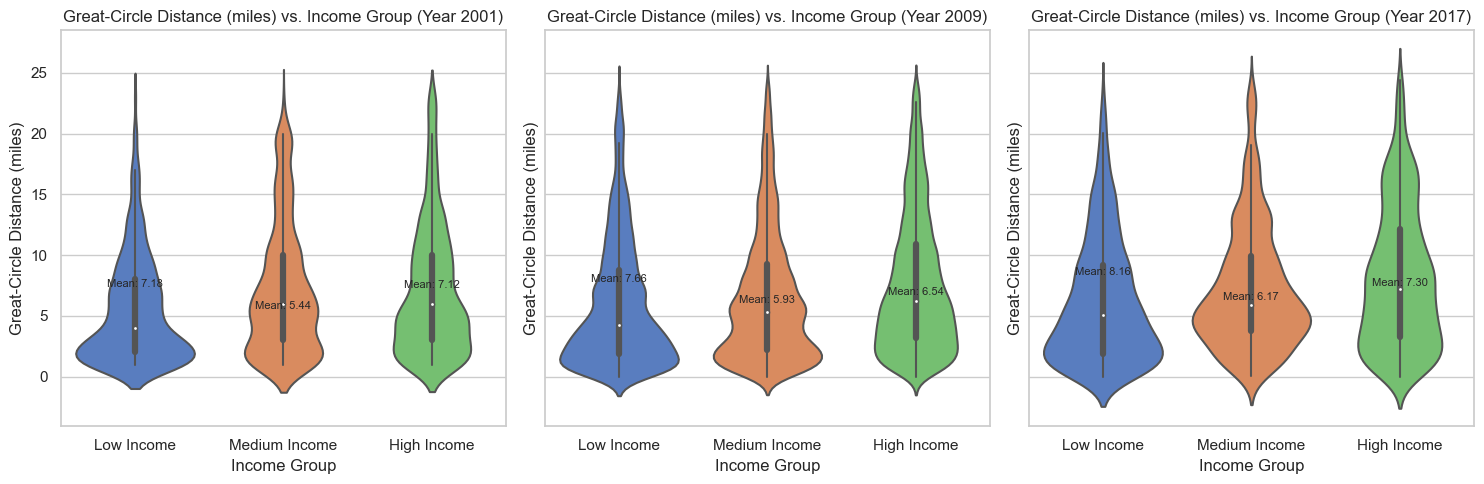

In [12]:
# When filtering out the outlier using IQR

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out distance that is less than or equal to 0
    oversampled_data_year = globals()[f'oversampled_data_{year}']
    
    # Filter out values less than or equal to 0
    filtered_data = oversampled_data_year[(oversampled_data_year['GCDWORK'] > 0)].copy()
    # Apply IQR method to filter out outliers
    filtered_data['GCDWORK'] = filter_outliers(filtered_data['GCDWORK'])


    # Create a new DataFrame for better readability
    data = {
        'GCDWORK': filtered_data['GCDWORK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['GCDWORK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='GCDWORK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Great-Circle Distance (miles) vs. Income Group (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Great-Circle Distance (miles)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### 2.2) Road network distance, in miles, between respondent's home location and work location
- DISTTOWK

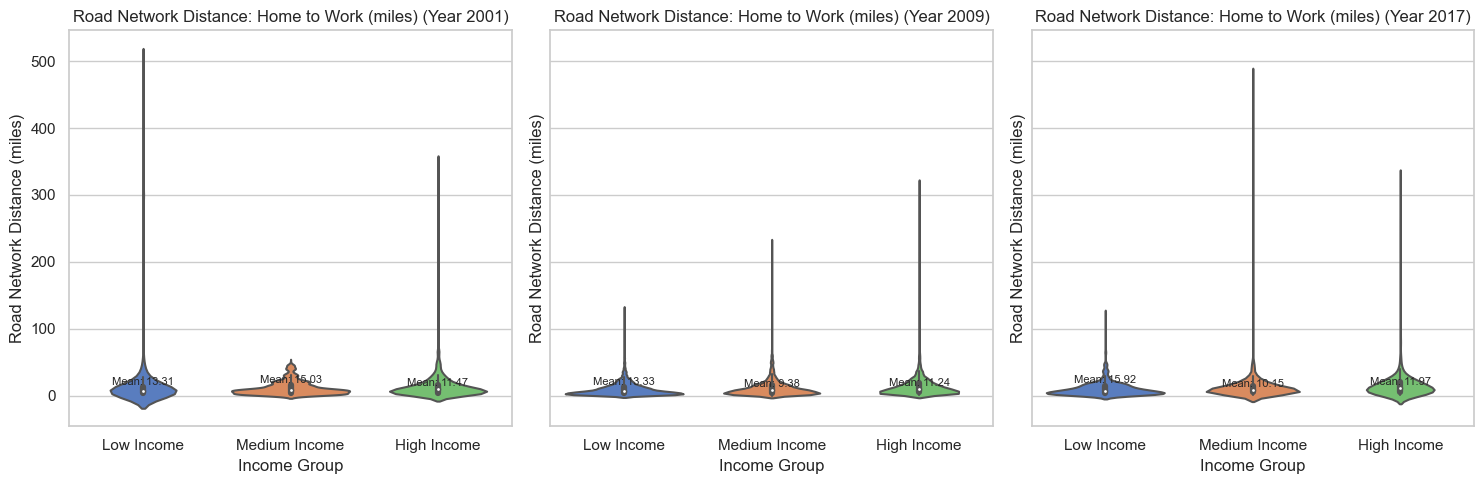

In [13]:
# When not filtering out the outliers

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out distance that is less than or equal to 0 and greater than 500 for the current year
    oversampled_data_year = globals()[f'oversampled_data_AllVariables_{year}']
    filtered_data = oversampled_data_year[(oversampled_data_year['DISTTOWK'] > 0) & (oversampled_data_year['DISTTOWK'] <= 500)]

    # Create a new DataFrame for better readability
    data = {
        'DISTTOWK': filtered_data['DISTTOWK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['DISTTOWK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='DISTTOWK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Road Network Distance: Home to Work (miles) (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Road Network Distance (miles)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


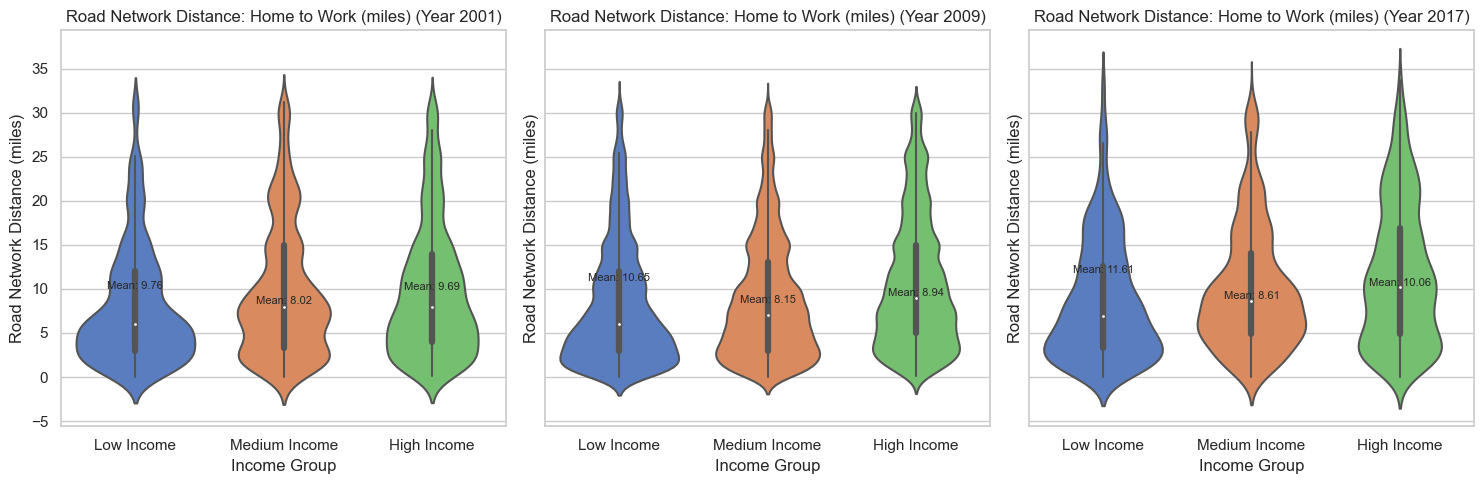

In [14]:
# When filtering out the outlier using IQR

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out distance that is less than or equal to 0
    oversampled_data_year = globals()[f'oversampled_data_AllVariables_{year}']
    
    # Filter out values less than or equal to 0
    filtered_data = oversampled_data_year[(oversampled_data_year['DISTTOWK'] > 0)].copy()
    # Apply IQR method to filter out outliers
    filtered_data['DISTTOWK'] = filter_outliers(filtered_data['DISTTOWK'])


    # Create a new DataFrame for better readability
    data = {
        'DISTTOWK': filtered_data['DISTTOWK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['DISTTOWK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='DISTTOWK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Road Network Distance: Home to Work (miles) (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Road Network Distance (miles)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### 2.3) Trip Time to Work

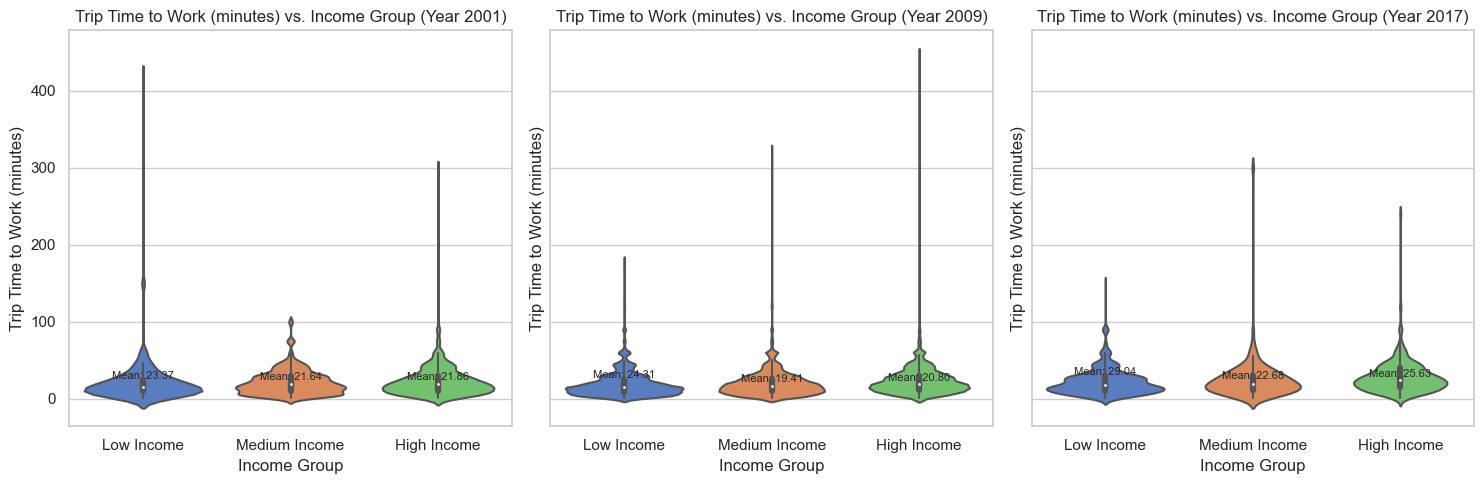

In [15]:
# When not filtering out the outliers

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out time that is less than or equal to 0 and greater than 500 for the current year
    oversampled_data_year = globals()[f'oversampled_data_{year}']
    filtered_data = oversampled_data_year[(oversampled_data_year['TIMETOWK'] > 0) & (oversampled_data_year['TIMETOWK'] <= 500)]

    # Create a new DataFrame for better readability
    data = {
        'TIMETOWK': filtered_data['TIMETOWK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['TIMETOWK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='TIMETOWK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Trip Time to Work (minutes) vs. Income Group (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Trip Time to Work (minutes)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


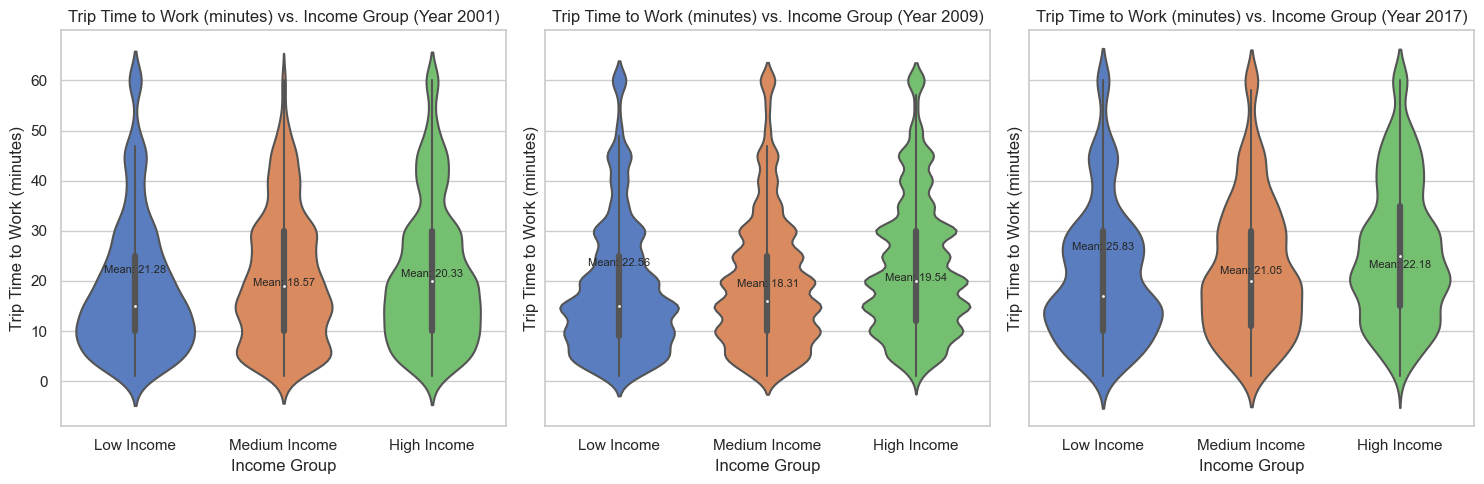

In [16]:
# When filtering out the outlier using IQR

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out distance that is less than or equal to 0
    oversampled_data_year = globals()[f'oversampled_data_{year}']
    
    # Filter out values less than or equal to 0
    filtered_data = oversampled_data_year[(oversampled_data_year['TIMETOWK'] > 0)].copy()
    # Apply IQR method to filter out outliers
    filtered_data['TIMETOWK'] = filter_outliers(filtered_data['TIMETOWK'])


    # Create a new DataFrame for better readability
    data = {
        'TIMETOWK': filtered_data['TIMETOWK'],
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Calculate means for each income group
    means = df_plot.groupby('Income Group')['TIMETOWK'].mean()

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a violin plot to visualize the relationship with specified order
    sns.violinplot(x='Income Group', y='TIMETOWK', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Add mean labels to the plot
    for j, label in enumerate(means.index):
        axes[i].text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)

    # Set title
    axes[i].set_title(f'Trip Time to Work (minutes) vs. Income Group (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Trip Time to Work (minutes)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## This analysis will support results why low-income people use cars as their first choice.

The analysis of common transportation modes of different income groups reveals a contrast trend against our initial assumption. 
Contrary to our first hypothesis, which suggested that individuals with low incomes might face challenges affording cars, the data indicates that low, medium, and high-income groups outstandingly rely on cars for their commute for work.

 
However, the results from the mean trip times to work are the reason behind this.
Across all income groups, the mean trip times and distance to work are quite similar. The mean trip time to work ranges from 18.31 to 25.83 minutes, while the mean distance to work falls within the range of 8.02 to 11.61 miles. 

These average commute times and distances are generally impractical for walking, biking, or taking public transportation when the travel time reliability is required for such an important trip purpose as work trips. Consequently, the predominant mode of transportation for all income groups, including those with lower incomes, is the use of cars. 

The average commuter faces distances that are prohibitive for alternative modes of transportation. Therefore, the reliance on cars becomes the only choice. This dependence on cars is especially noteworthy when considering our analysis area, Florida. Unlike densely populated urban areas like New York City, where walking to work is a viable option for many, the infrastructure and layout of Florida, and similar regions, present challenges to alternative transportation methods. The sprawling nature of cities and towns in Florida often requires residents to traverse considerable distances to reach their workplaces.

In contrast to the pedestrian-friendly environments found in cities like NYC, where public transit systems are well-developed, Florida's transportation landscape necessitates personal vehicles. Factors such as suburban sprawl, limited public transit options, and a lack of pedestrian-friendly infrastructure contribute to the reliance on cars as the primary means of commuting.


## References from literature will be provided

- Travel time and distance in each mode
https://improbable.com/2016/03/01/the-further-we-travel-the-faster-we-go-they-calculate/

![Image](https://improbable.com/wp-content/uploads/2016/02/travel-time-relation.jpg)


## 3)	Do people in urban and rural areas have different travel patterns for work among different income levels?

#### 3.1) Trip time to work between Rural/Urban

- The results are not meaningful

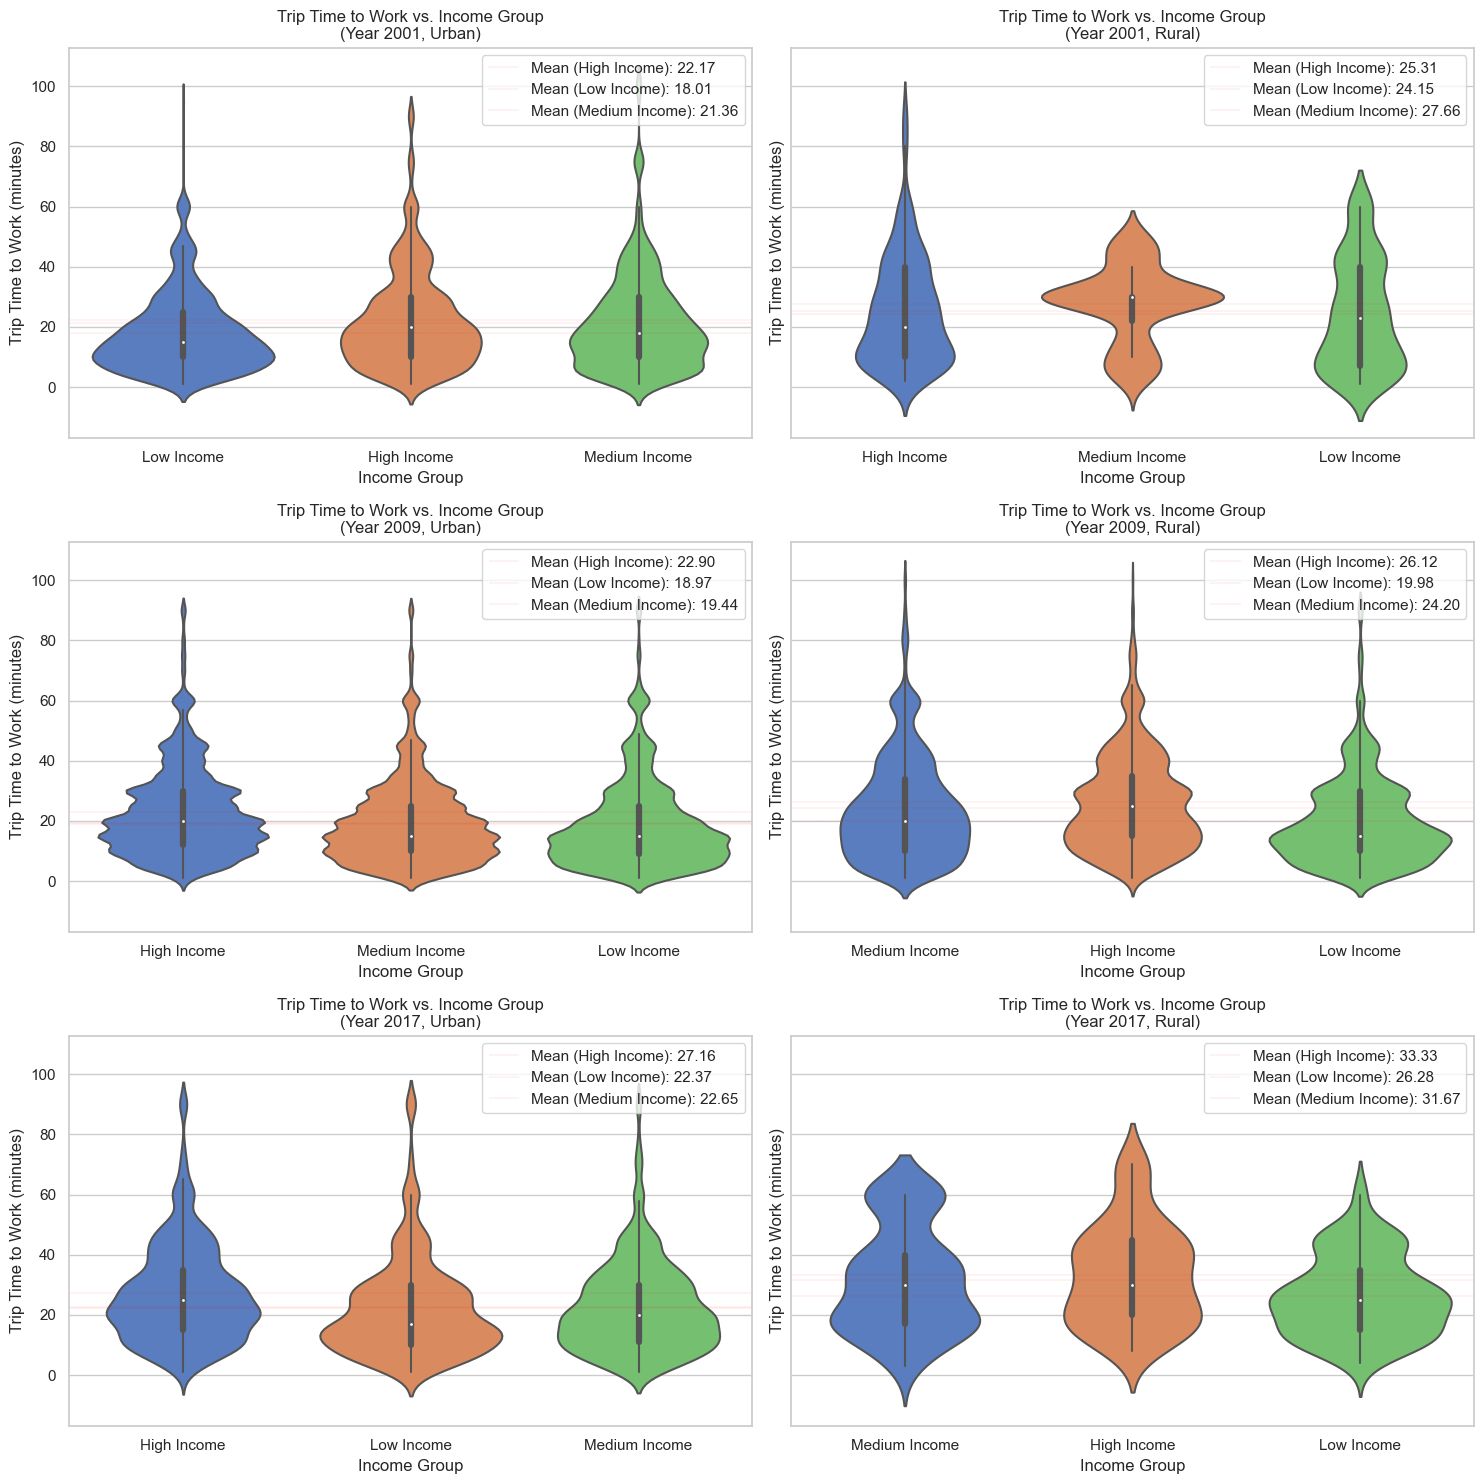

In [17]:
# Create subplots for each year and URBRUR category
fig, axes = plt.subplots(nrows=len(years), ncols=len(urbrur_labels), figsize=(15, 15), sharey=True)

# Iterate over each year and URBRUR category and create a plot
for i, year in enumerate(years):
    for j, urbrur_code in enumerate(urbrur_labels.keys()):
        # Filter out trip times less than or equal to 0 and greater than 100 for the current year and URBRUR category
        oversampled_data_year_urbrur = globals()[f'oversampled_data_{year}']
        filtered_data_urbrur = oversampled_data_year_urbrur[(oversampled_data_year_urbrur['TIMETOWK'] > 0) & (oversampled_data_year_urbrur['TIMETOWK'] <= 100) & (oversampled_data_year_urbrur['URBRUR'] == urbrur_code)]

        # Create a new DataFrame for better readability
        data_urbrur = {
            'TIMETOWK': filtered_data_urbrur['TIMETOWK'],
            'Income Group': filtered_data_urbrur['HHFAMINC2'].map(income_labels),
            'URBRUR': urbrur_labels[urbrur_code]
        }
        df_plot_urbrur = pd.DataFrame(data_urbrur)

        # Set the style for the plot
        sns.set(style="whitegrid")

        # Create a violin plot to visualize the relationship
        sns.violinplot(x='Income Group', y='TIMETOWK', data=df_plot_urbrur, palette="muted", ax=axes[i, j])
        
        # Calculate and draw a line at the mean value for each income group within the violin plot
        mean_value_urbrur = df_plot_urbrur.groupby('Income Group')['TIMETOWK'].mean()
        for income_group, mean in mean_value_urbrur.items():
            axes[i, j].axhline(mean, color='red', linestyle='dashed', linewidth=0.1, label=f'Mean ({income_group}): {mean:.2f}')
        
        # Set title
        axes[i, j].set_title(f'Trip Time to Work vs. Income Group\n(Year {year}, {urbrur_labels[urbrur_code]})')
        axes[i, j].set_xlabel('Income Group')
        axes[i, j].set_ylabel('Trip Time to Work (minutes)')
        axes[i, j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### 3.2) Transportation Modes by Area (Rural/Urban)

In [18]:
# Mapping for WRKTRANS column
transport_mode_mapping = {
    0: "Skip",
    1: "Car",
    2: "SUV",
    3: "NotAscertained",
    4: "CommuterBus",
    5: "Van",
    6: "Motorcycle",
    7: "PickupTruck",
    8: "Bicycle",
    9: "Walk",
    10: "Other",
    11: "AmtrackTrain",
    12: "Airplane",
    13: "TaxiCab",
    14: "DontKnow"
}

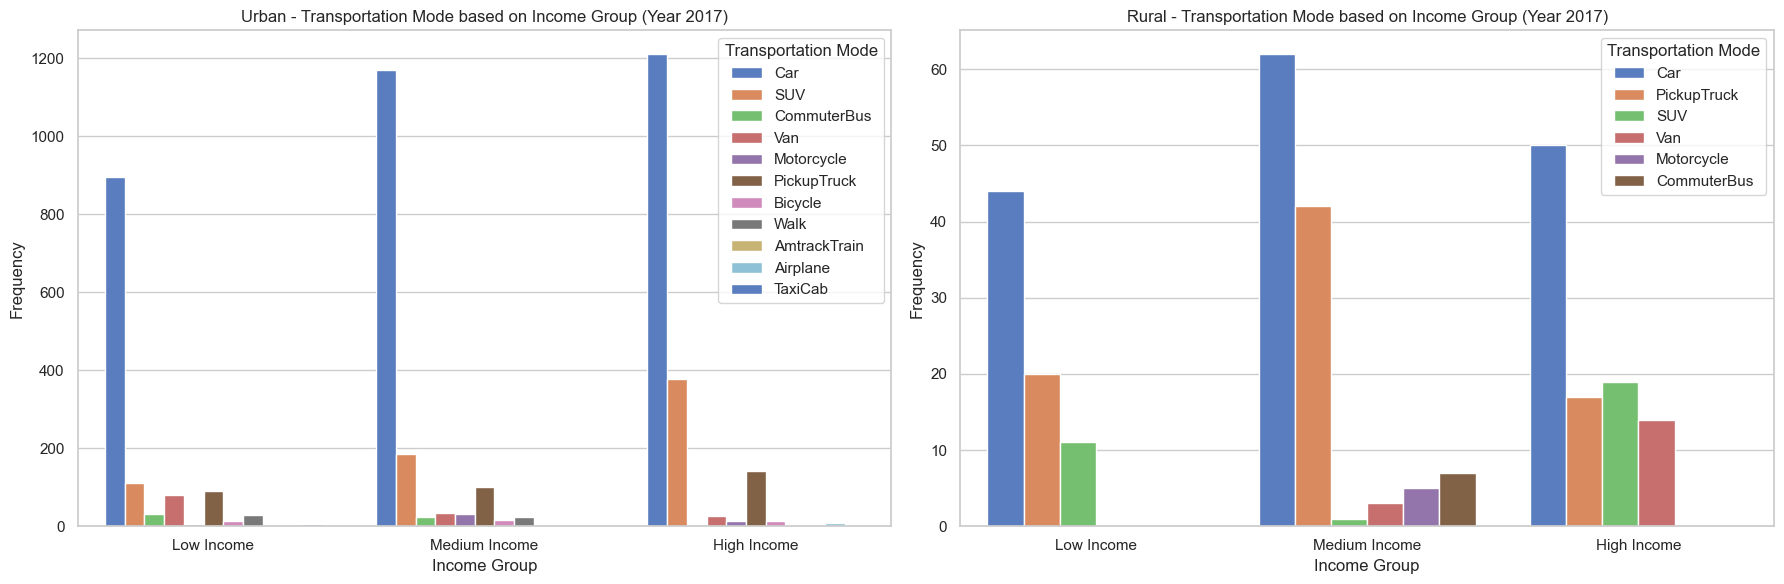

In [19]:
# Filter out DontKnow, NotAscertained, Skip, Other
filtered_df = oversampled_data_2017[~oversampled_data_2017['WRKTRANS'].isin([0, 3, 14, 10])]

# Define a custom color palette
custom_palette = sns.color_palette("muted", len(transport_mode_mapping))

# Plotting for Urban
urban_df = filtered_df[filtered_df['URBRUR'] == 0]
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Plot for Urban
plt.subplot(1, 2, 1)
sns.countplot(
    x='HHFAMINC2',
    hue='WRKTRANS',
    data=urban_df.replace({"WRKTRANS": transport_mode_mapping}),
    palette=custom_palette
)
plt.title('Urban - Transportation Mode based on Income Group (Year 2017)')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=[income_labels[i] for i in range(3)])
plt.legend(title='Transportation Mode')

# Plotting for Rural
rural_df = filtered_df[filtered_df['URBRUR'] == 1]

# Plot for Rural
plt.subplot(1, 2, 2)
sns.countplot(
    x='HHFAMINC2',
    hue='WRKTRANS',
    data=rural_df.replace({"WRKTRANS": transport_mode_mapping}),
    palette=custom_palette
)
plt.title('Rural - Transportation Mode based on Income Group (Year 2017)')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=[income_labels[i] for i in range(3)])
plt.legend(title='Transportation Mode')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Temporal Trends

## 1)	How has the frequency of working from home varied among different income groups in Florida over 2001, 2009, and 2017?

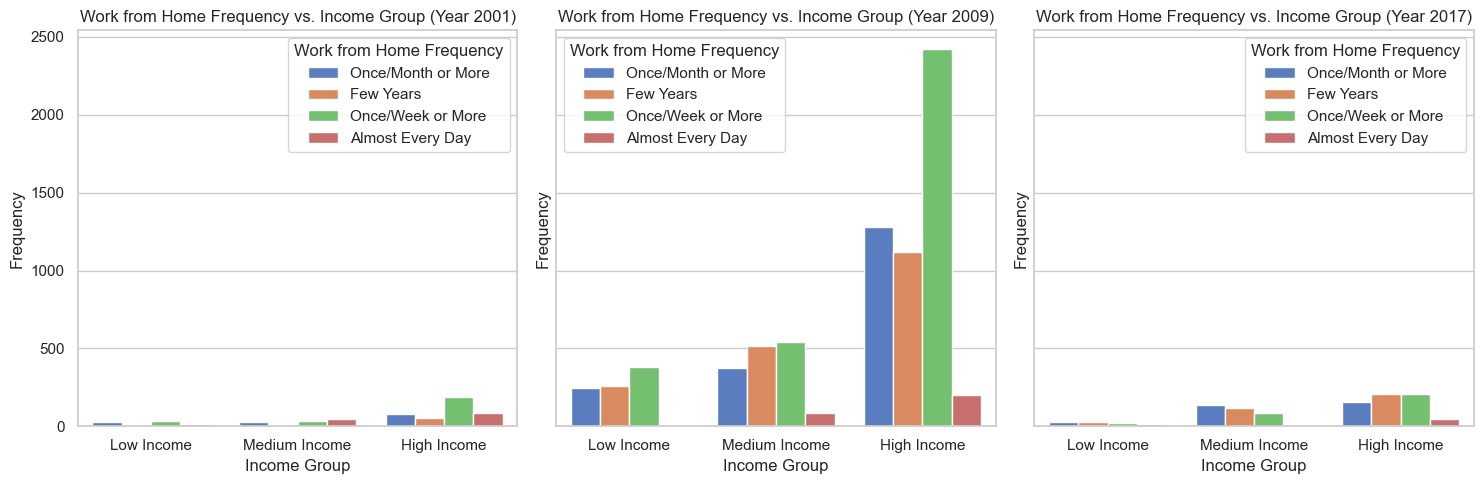

In [20]:
# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5), sharey=True)

# Iterate over each year and create a plot
for i, year in enumerate(years):
    # Filter out the "Skip" values for work from home frequency
    oversampled_data_year = globals()[f'oversampled_data_{year}']
    filtered_data = oversampled_data_year[oversampled_data_year['WKFMHMXX'] != 0].copy()

    # Create a new DataFrame for better readability
    data = {
        'Work from Home Frequency': filtered_data['WKFMHMXX'].map({
            1: 'Once/Month or More',
            2: 'Few Years',
            3: 'Once/Week or More',
            4: 'Almost Every Day'
        }),
        'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
    }
    df_plot = pd.DataFrame(data)

    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a count plot to visualize the relationship with specified order
    sns.countplot(x='Income Group', hue='Work from Home Frequency', data=df_plot, palette="muted", order=income_order, ax=axes[i])

    # Set title
    axes[i].set_title(f'Work from Home Frequency vs. Income Group (Year {year})')
    axes[i].set_xlabel('Income Group')
    axes[i].set_ylabel('Frequency')

    # Add legend
    axes[i].legend(title='Work from Home Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## 2)	Internet usage trends among different income groups

In [22]:
oversampled_data_2001['WEBUSE'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [23]:
oversampled_data_2009['WEBUSE'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
oversampled_data_2017['WEBUSE.1'].unique()

array([0, 1, 2, 3, 4, 5])

In [25]:
# Define the mapping dictionaries
mapping_2001 = {
    0: "Skip",
    1: "Almost Everyday",
    2: "Once A Month",
    3: "Several A Week",
    4: "Once A Week",
    5: "Never",
    6: "DontKnow"
}

mapping_2009 = {
    0: "Never",
    1: "Almost Everyday",
    2: "Several A Week",
    3: "Once A Week",
    4: "Once A Month",
    5: "Skip",
    6: "DontKnow",
    7: "Refused",
    8: "NotAscertained"
}

mapping_2017 = {
    0: "Daily",
    1: "Never",
    2: "Few A Month",
    3: "Few A Week",
    4: "NotAscertained",
    5: "Few A Year"
}


In [26]:
# Remove the old column
oversampled_data_2017.drop(columns='WEBUSE', inplace=True)

# Rename the column
oversampled_data_2017.rename(columns={'WEBUSE.1': 'WEBUSE'}, inplace=True)

In [27]:
# Mapping
oversampled_data_2001['WEBUSE'] = oversampled_data_2001['WEBUSE'].map(mapping_2001)
oversampled_data_2009['WEBUSE'] = oversampled_data_2009['WEBUSE'].map(mapping_2009)
oversampled_data_2017['WEBUSE'] = oversampled_data_2017['WEBUSE'].map(mapping_2017)

In [28]:
# Drop unnecessary columns
columns_to_drop = ["Never", "Skip", "DontKnow", "Refused", "NotAscertained"]

oversampled_data_2001 = oversampled_data_2001[~oversampled_data_2001['WEBUSE'].isin(columns_to_drop)]
oversampled_data_2009 = oversampled_data_2009[~oversampled_data_2009['WEBUSE'].isin(columns_to_drop)]
oversampled_data_2017 = oversampled_data_2017[~oversampled_data_2017['WEBUSE'].isin(columns_to_drop)]


In [29]:
oversampled_data_2001['WEBUSE'].unique()

array(['Almost Everyday', 'Once A Month', 'Several A Week', 'Once A Week'],
      dtype=object)

In [30]:
oversampled_data_2009['WEBUSE'].unique()

array(['Almost Everyday', 'Several A Week', 'Once A Week', 'Once A Month'],
      dtype=object)

In [31]:
oversampled_data_2017['WEBUSE'].unique()

array(['Daily', 'Few A Month', 'Few A Week', 'Few A Year'], dtype=object)

In [32]:
# Get unique values of the 'WEBUSE' column
webuse_categories = oversampled_data_2017['WEBUSE'].unique()

# Filter the DataFrame for each income group
low_income_data = oversampled_data_2017[oversampled_data_2017['HHFAMINC2'] == 0]
medium_income_data = oversampled_data_2017[oversampled_data_2017['HHFAMINC2'] == 1]
high_income_data = oversampled_data_2017[oversampled_data_2017['HHFAMINC2'] == 2]

# Calculate the percentage of web use for each income group
def calculate_percentage(data):
    total_count = len(data)
    webuse_counts = data['WEBUSE'].value_counts()
    percentage = (webuse_counts / total_count) * 100
    return percentage

# Calculate percentages for each income group
low_income_percentage = calculate_percentage(low_income_data)
medium_income_percentage = calculate_percentage(medium_income_data)
high_income_percentage = calculate_percentage(high_income_data)


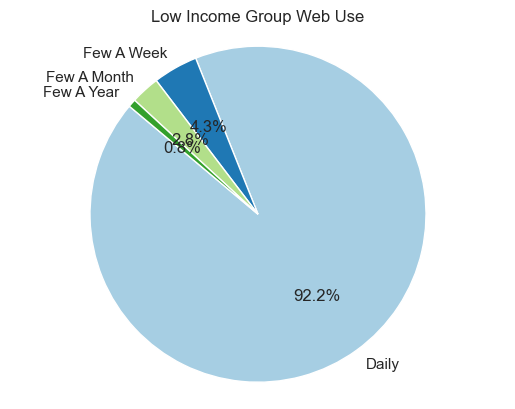

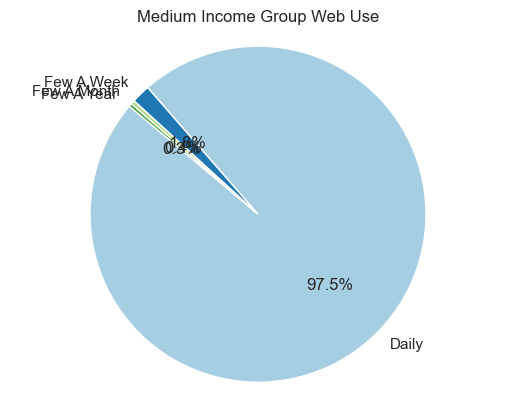

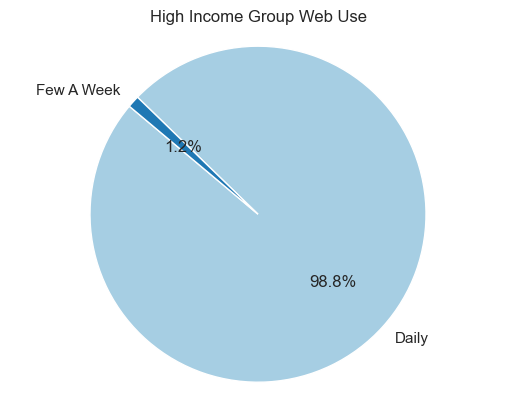

In [33]:
import matplotlib.pyplot as plt

# Function to create a pie plot for a given percentage series and title
def create_pie_plot(percentage, title):
    labels = percentage.index
    sizes = percentage.values
    colors = plt.cm.Paired(range(len(labels)))

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

# Create pie plots for each income group
create_pie_plot(low_income_percentage, 'Low Income Group Web Use')
create_pie_plot(medium_income_percentage, 'Medium Income Group Web Use')
create_pie_plot(high_income_percentage, 'High Income Group Web Use')
